In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from sklearn import metrics
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    med_ae = metrics.median_absolute_error(y_true, y_pred)

    print("mean_absolute_error", mae)
    #print("mean_squared_error", mse)
    print("RMSE", np.sqrt(mse))
    print("median_absolute_error", med_ae)

In [3]:
data = pd.read_csv("./racquets.csv")

data.head()

,index,pcode,mfg,racquet,headsize,length,weight,balance,swingweight,flex,...,hittingweight,vibration,filter,distance,spin,angle,shotspeed,swingspeed,plow,time
0,0,VS5,Volkl,V-Sense 5,100,27.0,276,33.5,281,70,...,114,164,21/2-effort,68.5,1596,3.6,64.5,51.4,37,0.89
1,1,U100UL,Wilson,Ultra 100UL,100,27.0,270,34.0,283,68,...,116,164,21/2-effort,68.5,1595,3.6,64.8,51.3,38,0.88
2,2,BULS1H,Wilson,Burn 100 ULS (2017),100,27.0,281,34.1,288,67,...,119,158,21/2-effort,68.2,1579,3.4,65.2,51.0,39,0.87
3,3,YEZLLG,Yonex,Ezone Lite,100,27.0,282,33.3,292,64,...,119,156,21/2-effort,68.1,1579,3.4,65.2,51.0,39,0.87
4,4,TPS270,Tecnifibre,T-Flash PS 270,100,27.0,285,34.1,293,69,...,119,160,21/2-effort,67.8,1570,3.5,64.9,50.7,39,0.87


In [4]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


numeric_features = ['weight', 'balance', 'length']
categorical_features = ['mfg']


swingweight_prediction_frame = pd.concat([data[numeric_features], pd.get_dummies(data[categorical_features])],axis=1)
swingweight_prediction_frame['weight:length'] = swingweight_prediction_frame['weight'] * swingweight_prediction_frame['length']
swingweight_prediction_frame['weight:balance'] = swingweight_prediction_frame['weight'] * swingweight_prediction_frame['balance']
swingweight_prediction_frame['length:balance'] = swingweight_prediction_frame['length'] * swingweight_prediction_frame['balance']

X = swingweight_prediction_frame
y = data['swingweight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.9)

In [5]:
X_train

,weight,balance,length,mfg_Babolat,mfg_Dunlop,mfg_Head,mfg_Lacoste,mfg_Prince,mfg_Pro Kennex,mfg_ProKennex,mfg_Tecnifibre,mfg_Volkl,mfg_Wilson,mfg_Yonex,weight:length,weight:balance,length:balance
68,283,35.0,27.2,0,0,1,0,0,0,0,0,0,0,0,7697.6,9905.0,952.00
197,314,33.5,27.5,0,0,0,0,0,0,0,0,0,0,1,8635.0,10519.0,921.25
15,295,33.0,27.0,0,0,0,0,0,0,0,0,0,0,1,7965.0,9735.0,891.00
30,293,33.1,27.0,0,0,1,0,0,0,0,0,0,0,0,7911.0,9698.3,893.70
172,318,33.5,27.0,0,0,0,0,0,0,0,0,0,1,0,8586.0,10653.0,904.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,281,34.8,27.0,0,0,1,0,0,0,0,0,0,0,0,7587.0,9778.8,939.60
188,340,32.5,27.0,0,0,1,0,0,0,0,0,0,0,0,9180.0,11050.0,877.50
71,309,32.0,27.0,0,0,0,0,0,0,0,0,0,1,0,8343.0,9888.0,864.00
106,318,33.0,27.0,0,0,0,0,0,0,0,0,0,1,0,8586.0,10494.0,891.00


# OLS

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


np.random.seed(9876789)

In [9]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
#model = smf.ols("swingweight ~ .", data=)

predictor = model.fit()

print(predictor.summary())

                            OLS Regression Results                            
Dep. Variable:            swingweight   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     52.26
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.61e-65
Time:                        15:59:13   Log-Likelihood:                -734.23
No. Observations:                 236   AIC:                             1502.
Df Residuals:                     219   BIC:                             1561.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5969.8211   3417.702     -1.

In [10]:
print("R2: ", predictor.rsquared)

R2:  0.7924474151558212


In [11]:
pred_ols = predictor.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]


In [12]:
X_test = sm.add_constant(X_test)
y_pred = predictor.predict(X_test)
calculate_metrics(y_test, y_pred)


mean_absolute_error 4.153144189468616
RMSE 5.609549547100251
median_absolute_error 2.323876980595287


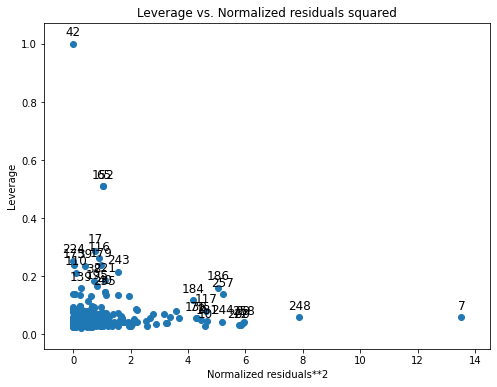

In [13]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(predictor, ax=ax)

#  WLS

In [16]:
w  = np.ones(len(X_train))

mod_wls = sm.WLS(y_train, X_train, weights=1.0 / (w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:            swingweight   R-squared:                       0.792
Model:                            WLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     52.26
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.61e-65
Time:                        15:59:32   Log-Likelihood:                -734.23
No. Observations:                 236   AIC:                             1502.
Df Residuals:                     219   BIC:                             1561.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5969.8211   3417.702     -1.

In [17]:
print("R2: ", res_wls.rsquared)
y_pred = res_wls.predict(X_test)
calculate_metrics(y_test, y_pred)

R2:  0.7924474151558212
mean_absolute_error 4.153144189468616
RMSE 5.609549547100251
median_absolute_error 2.323876980595287


# RLM

In [19]:
mod_rlm = sm.RLM(y_train, X_train)
res_rlm = mod_rlm.fit()
print(res_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            swingweight   No. Observations:                  236
Model:                            RLM   Df Residuals:                      219
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 18 Feb 2022                                         
Time:                        15:59:56                                         
No. Iterations:                    16                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5657.1086   3289.797     -1.

In [22]:
y_pred = res_rlm.predict(X_test)
calculate_metrics(y_test, y_pred)

mean_absolute_error 4.123252284874895
RMSE 5.707920815851602
median_absolute_error 2.230322627323403


In [29]:
from sklearn.linear_model import QuantileRegressor

qr_sklearn = QuantileRegressor().fit(X_train, y_train)
y_pred = qr_sklearn.predict(X_test)
calculate_metrics(y_test, y_pred)


mean_absolute_error 4.108149959364139
RMSE 5.787481982442526
median_absolute_error 2.9496295043040845
